# INTRODUCTION

### Aim of the Notebook:-  

The objective is to create a model that can predict the mortgage backed securities prepayment risk using machine learning models.

### Data Id 📋
    
This dataset is named [LoanExport]. The dataset contains a set of **291451 records** under **28 attributes**:

| Column Name                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `CreditScore`                   | Numeric representation of a borrower's creditworthiness.                                             |
| `FirstPaymentDate`                       | The date when the borrower makes their first mortgage payment.                                             |
| `FirstTimeHomebuyer`                  | Indicator if the borrower is a first-time homebuyer.                 |
| `MaturityDate`                   | TDate when the mortgage loan matures or is due to be fully repaid. |
| `MSA`                         | Metropolitan Statistical Area, a geographical region used for demographic and economic analysis.                                              |
| `MIP`                          | Mortgage Insurance Premium, a fee for certain mortgage loans to protect lenders against losses.                             |
| `Units`                 | Number of housing units in the property (e.g., single-family, multi-unit building).                                                      |
| `Occupancy`         | Indicates if the property is owner-occupied, a second home, or an investment property.                        |
| `OCLTV`                       | Original Combined Loan-to-Value ratio, a measure of the loan amount compared to the property value.                    |
| `DTI`              | Debt-to-Income ratio, comparing a borrower's debt payments to their income.                                 |
| `OrigUPB`                       | Original Unpaid Principal Balance, the initial loan amount.                    |
| `LTV`                 |  Loan-to-Value ratio, a measure of the loan amount compared to the property value. |
| `OrigInterestRate`    | Original interest rate on the mortgage loan.|
| `Channel`               | The distribution channel through which the mortgage was originated (e.g., retail, broker).  |
| `PPM`                   |Prepayment Penalty Mortgage indicator.|  
 |`ProductType`|          Type of mortgage product (e.g., fixed-rate, adjustable-rate). |
 |`PropertyState`              |State in which the property is located. |
 |`PropertyType`                |Type of property (e.g., single-family residence, condominium).|
 |`PostalCode`        |Postal code of the property's location.|
 |`LoanSeqNum`       |dUnique identifier for each loan.|
 |`LoanPurpose`             |Reason for obtaining the loan (e.g., purchase, refinance).|
 |`OrigLoanTerm`         |Original loan term in months.|
 |`NumBorrowers`            |Number of borrowers on the loan.|
 |`SellerName`              |Name of the entity selling the mortgage.|
 |`ServicerName`            |Name of the company servicing the mortgage.|
 |`EverDelinquent`           | Indicator if the loan has ever been delinquent.|
 |`MonthsDelinquent`           |Number of months the loan payments have been delinquent.|
 |`MonthsInRepayment`          |Number of months since the loan entered the repayment phase.|

# Libraries 📕📗📘


In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

# Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from matplotlib.colors import ListedColormap  # Add this import
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV


#train test split
from sklearn.model_selection import train_test_split

# models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import pickle
import joblib
#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
from myProject1.preprocessing import data_processing_pipeline
from myProject1.FeatureEngineering import feature_engineering_pipeline

## Data collection and Analysis

In [3]:
df = pd.read_csv('LoanExport.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:

df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [6]:
df.shape

(291451, 28)

# Data Preprocessing

In [7]:
df_initial = df

In [8]:
df_initial.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [9]:
categorical_feature =df_initial.describe(exclude=[np.number])
categorical_feature

,FirstTimeHomebuyer,MSA,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,NumBorrowers,SellerName,ServicerName
count,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,266457,291451
unique,3,392,3,4,3,1,53,7,1767,291451,3,3,20,20
top,N,X,O,T,N,FRM,CA,SF,94500,F199Q1268030,P,2,Ot,Other servicers
freq,184154,39100,276131,167670,282125,291451,43327,244923,2582,1,123404,187335,76943,64043


In [10]:
numerical_feature = df_initial.describe(exclude=[object])
numerical_feature

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [11]:
# list of all the numeric columns and therir categories

num = df_initial.select_dtypes('number').columns.to_list()
print('NUMERICAL FEATURE')
print([df_initial[numerical].value_counts() for numerical in num])

#list of all the categoric columnsand therir categories

cat = df_initial.select_dtypes('object').columns.to_list()
print('CATERGORICAL FEATURE')
print([df_initial[category].value_counts() for category in cat])



NUMERICAL FEATURE
[CreditScore
748    2567
734    2537
747    2456
753    2427
764    2419
       ... 
391       1
396       1
445       1
462       1
849       1
Name: count, Length: 370, dtype: int64, FirstPaymentDate
199905    104071
199904     91152
199903     89401
199902      2300
199906      2083
           ...  
201111         1
201303         1
200311         1
200403         1
200404         1
Name: count, Length: 66, dtype: int64, MaturityDate
202904    104210
202903     91059
202902     89304
202901      2282
202905      2067
           ...  
202403         1
203304         1
203308         1
203210         1
203202         1
Name: count, Length: 96, dtype: int64, MIP
0     184511
25     42441
30     41869
12     13294
18      3005
17      2739
35      1290
36       748
29       640
20       497
14       166
27        66
22        45
6         32
33        24
32         9
28         9
15         7
50         7
47         7
26         7
24         6
16         5
1          5

In [12]:
df_initial.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [13]:
df_initial

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


# Data labeling 

Target Column is EverDelinquent so we will push it to end of the dataframe

In [14]:
df_final = df_initial
target_column = df_final['EverDelinquent']
df_final.drop('EverDelinquent', axis = 1, inplace = True)
df_final['Target'] = target_column

In [15]:
df_final.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,MonthsDelinquent,MonthsInRepayment,Target
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,52,0
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,144,0
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,67,0
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,35,0
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,54,0


# Feature Engineering


**Categorical values**:

We have 14 columns we need to delete or encode.

* Ordinal variables:
    * `NumBorrowers`  
    * `PPM`
    * `Credit Bins`
    * `LTV Bins`
    * `MonthsInRepayment_bins`
    
* Nominal variables:
    * `FirstTimeHomebuyer `  
    * `MSA`
    * `Occupancy`
    * `Channel`
    * `ProductType`
    * `PropertyType`
    * `PropertyState`
    * `PostalCode`
    * `LoanSeqNum`
    * `LoanPurpose`
    * `SellerName`
    * `ServicerName`

**Numeric values**:

* From the numeric variables `FirstPaymentDate`, `MaturityDate`, and `OrigLoanTerm` is no longer needed

**Conclusion:**

With the help of EDA i have decided to remove these column:-

1. The columns `PostalCode`, `PPM `, `LoanSeqNum`, `ProductType` and `Occupancy` don't have significant values so we will drop them.
2. NumBorrowers variables will be Label encoded.
3. Rest of Nominal variable will be One Hot encoded.



In [16]:
df_final

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,MonthsDelinquent,MonthsInRepayment,Target
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,52,0
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,144,0
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,67,0
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,35,0
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,12,0
291447,840,200210,N,202904,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,53,0
291448,840,200304,N,202904,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,38,0
291449,845,199904,N,202903,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,32,0


In [17]:
# Feature Selection

Top_feature = SelectKBest(score_func = f_classif, k = 30)


In [18]:
X = df_final.drop(columns=['Target'], axis = 1)
Y = df_final.filter(items=['Target'])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

# Pipeline

In [20]:
from sklearn.pipeline import Pipeline, FeatureUnion

# merged_pipeline = FeatureUnion([
#     ('data_processing', data_processing_pipeline),
#     ('feature_engineering', feature_engineering_pipeline),
#     ('feature_selection', Top_feature)
# ],  n_jobs=1)

# Define the final pipeline with a classifier (e.g., Logistic Regression)
final_pipeline = Pipeline([
    ('data_processing', data_processing_pipeline),
    ('feature_engineering', feature_engineering_pipeline),
    ('feature_selection', Top_feature),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(class_weight={0: 1.0, 1: 10.0},
                                random_state=42))
])

# Fit the final pipeline
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('data_processing',
                 Pipeline(steps=[('replace_x_with_nan', ReplaceXWithNaN()),
                                 ('impute_missing_values',
                                  ImputeMissingValues()),
                                 ('credit_transformation',
                                  CreditTransformation()),
                                 ('ltv_transformation', LTVTransformation()),
                                 ('months_in_repayment_transformation',
                                  MonthsInRepaymentTransformation())])),
                ('feature_engineering',
                 Pipeline(steps=[('l...
                                 ('one_hot_encoding',
                                  OneHotEncoderTransformer(columns=['ServicerName',
                                                                    'SellerName',
                                                                    'PropertyState',
                                                                    'MSA',
                                                                    'FirstTimeHomebuyer',
                                                                    'Channel',
                                                                    'PropertyType',
                                                                    'LoanPurpose'])),
                                 ('remaining_features',
                                  RemainingFeaturesTransformer())])),
                ('feature_selection', SelectKBest(k=30)),
                ('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(class_weight={0: 1.0, 1: 10.0},
                                    random_state=42))])

In [21]:
def evaluation_metrix(Y_test, Y_predicted):
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
#     confusion = confusion_matrix(y_test, y_pred)
#     print("Confusion Matrix:\n", confusion)
    cm = confusion_matrix(Y_test, Y_predicted)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title('Confusion Matrix:logistic regression')
    plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46785
           1       1.00      1.00      1.00     11506

    accuracy                           1.00     58291
   macro avg       1.00      1.00      1.00     58291
weighted avg       1.00      1.00      1.00     58291



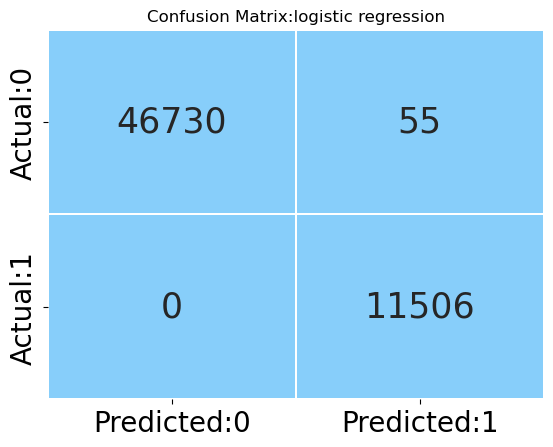

In [23]:
# clf = LogisticRegression(random_state=42)
# print('pipeline model score for training data is',final_pipeline.score(x_train, y_train)*100)
y_pred = final_pipeline.predict(x_test)
evaluation_metrix(y_test, y_pred)

In [24]:
# joblib.dump(final_pipeline,'Logistic_Regression.pkl')
import pickle
pickle.dump(final_pipeline,open('LogisticRegression.pkl','wb'))